# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Import Data

In [2]:
# Import data.
loan_data_preprocessed_backup = pd.read_csv('loan_data_preprocessed.csv')

C:\Users\thdam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (20,50,60,119,130,131,132,135,136,137,140,146,147,148) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Explore Data

In [3]:
loan_data_preprocessed = loan_data_preprocessed_backup.copy()

In [4]:
loan_data_preprocessed.columns.values
# Displays all column names.

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med',
       'mths_since_last_maj

In [5]:
loan_data_preprocessed.head()

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  68407277        NaN     3600.0       3600.0           3600.0   
1           1  68355089        NaN    24700.0      24700.0          24700.0   
2           2  68341763        NaN    20000.0      20000.0          20000.0   
3           3  66310712        NaN    35000.0      35000.0          35000.0   
4           4  68476807        NaN    10400.0      10400.0          10400.0   

         term  int_rate  installment grade  ... addr_state:UT addr_state:VA  \
0   36 months     13.99       123.03     C  ...             0             0   
1   36 months     11.99       820.28     C  ...             0             0   
2   60 months     10.78       432.66     B  ...             0             0   
3   60 months     14.85       829.90     C  ...             0             0   
4   60 months     22.45       289.91     F  ...             0             0   

  addr_state:VT addr_state:WA  addr_state:WI addr_state:WV addr_state:WY  \
0             0             0              0             0             0   
1             0             0              0             0             0   
2             0             0              0             0             0   
3             0             0              0             0             0   
4             0             0              0             0             0   

  initial_list_status:f initial_list_status:w good_bad  
0                     0                     1        1  
1                     0                     1        1  
2                     0                     1        1  
3                     0                     1        1  
4                     0                     1        1  

[5 rows x 286 columns]

In [6]:
loan_data_preprocessed.tail()

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
2260663     2260694  89885898        NaN    24000.0      24000.0   
2260664     2260695  88977788        NaN    24000.0      24000.0   
2260665     2260696  88985880        NaN    40000.0      40000.0   
2260666     2260697  88224441        NaN    24000.0      24000.0   
2260667     2260698  88215728        NaN    14000.0      14000.0   

         funded_amnt_inv        term  int_rate  installment grade  ...  \
2260663          24000.0   60 months     12.79       543.50     C  ...   
2260664          24000.0   60 months     10.49       515.74     B  ...   
2260665          40000.0   60 months     10.49       859.56     B  ...   
2260666          24000.0   60 months     14.49       564.56     C  ...   
2260667          14000.0   60 months     14.49       329.33     C  ...   

        addr_state:UT addr_state:VA addr_state:VT addr_state:WA  \
2260663             0             0             0             0   
2260664             1             0             0             0   
2260665             0             0             0             0   
2260666             0             0             0             0   
2260667             0             0             0             0   

         addr_state:WI addr_state:WV addr_state:WY initial_list_status:f  \
2260663              0             0             0                     1   
2260664              0             0             0                     1   
2260665              0             0             0                     1   
2260666              0             0             0                     1   
2260667              0             0             0                     0   

        initial_list_status:w good_bad  
2260663                     0        1  
2260664                     0        1  
2260665                     0        1  
2260666                     0        0  
2260667                     1        1  

[5 rows x 286 columns]

In [7]:
loan_data_defaults = loan_data_preprocessed[loan_data_preprocessed['loan_status'].isin(['Charged Off','Does not meet the credit policy. Status:Charged Off'])]
# Here we take only the accounts that were charged-off (written-off).

In [8]:
loan_data_defaults.shape

(269320, 286)

In [9]:
pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [10]:
loan_data_defaults.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                          269320
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           22511
emp_length                                                          21145
home_ownership                        

# Independent Variables

In [11]:
loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)
# We fill the missing values with zeroes.

C:\Users\thdam\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [12]:
#loan_data_defaults['mths_since_last_delinq'].fillna(loan_data_defaults['mths_since_last_delinq'].max() + 12, inplace=True)

In [13]:
loan_data_defaults['mths_since_last_record'].fillna(0, inplace=True)
# We fill the missing values with zeroes.

# Dependent Variables

In [14]:
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']
# We calculate the dependent variable for the LGD model: recovery rate.
# It is the ratio of recoveries and funded amount.

<ipython-input-14-2a91dc6ea6a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']


In [15]:
loan_data_defaults['recovery_rate'].describe()
# Shows some descriptive statisics for the values of a column.

count    269320.000000
mean          0.075338
std           0.095224
min           0.000000
25%           0.000000
50%           0.061853
75%           0.112435
max           2.170300
Name: recovery_rate, dtype: float64

In [16]:
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])
# We set recovery rates that are greater than 1 to 1 and recovery rates that are less than 0 to 0.

<ipython-input-16-d5a53f8d3957>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
<ipython-input-16-d5a53f8d3957>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])


In [17]:
loan_data_defaults['recovery_rate'].describe()
# Shows some descriptive statisics for the values of a column.

count    269320.000000
mean          0.075309
std           0.094896
min           0.000000
25%           0.000000
50%           0.061853
75%           0.112435
max           1.000000
Name: recovery_rate, dtype: float64

In [18]:
loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']
# We calculate the dependent variable for the EAD model: credit conversion factor.
# It is the ratio of the difference of the amount used at the moment of default to the total funded amount.

<ipython-input-18-0bfa67ee4ad3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']


In [19]:
loan_data_defaults['CCF'].describe()
# Shows some descriptive statisics for the values of a column.

count    269320.000000
mean          0.697208
std           0.218809
min           0.000000
25%           0.566590
50%           0.747175
75%           0.871866
max           1.000000
Name: CCF, dtype: float64

In [20]:
loan_data_defaults.to_csv('loan_data_defaults.csv')
# We save the data to a CSV file.

# Explore Dependent Variables

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([9.6344e+04, 4.6710e+03, 5.6280e+03, 7.8120e+03, 8.0900e+03,
        1.0348e+04, 1.0209e+04, 1.2764e+04, 1.4926e+04, 1.5877e+04,
        1.2528e+04, 1.1717e+04, 1.2781e+04, 1.1301e+04, 5.2950e+03,
        3.1390e+03, 2.9640e+03, 2.6470e+03, 1.9310e+03, 1.6990e+03,
        1.6570e+03, 1.1650e+03, 8.5100e+02, 6.6100e+02, 5.4600e+02,
        5.5500e+02, 5.2500e+02, 5.2800e+02, 5.4800e+02, 4.7900e+02,
        5.5600e+02, 5.2400e+02, 4.8600e+02, 5.1400e+02, 5.1700e+02,
        4.9500e+02, 4.4300e+02, 4.2300e+02, 4.4500e+02, 4.2700e+02,
        4.4400e+02, 3.4200e+02, 3.3000e+02, 3.0000e+02, 2.6800e+02,
        2.4000e+02, 2.0200e+02, 1.6800e+02, 1.5800e+02, 1.3700e+02,
        1.3500e+02, 1.0600e+02, 1.0400e+02, 9.3000e+01, 6.8000e+01,
        6.6000e+01, 4.9000e+01, 5.6000e+01, 5.0000e+01, 4.7000e+01,
        5.3000e+01, 3.7000e+01, 4.8000e+01, 3.5000e+01, 3.4000e+01,
        3.3000e+01, 2.9000e+01, 2.4000e+01, 3.1000e+01, 2.0000e+01,
        2.0000e+01, 1.4000e+01, 1.9000e+01, 1.70

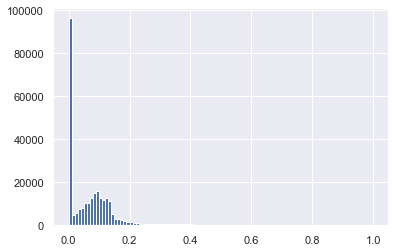

In [22]:
plt.hist(loan_data_defaults['recovery_rate'], bins = 100)
# We plot a histogram of a variable with 100 bins.

(array([1.01015e+05, 1.34400e+04, 1.84380e+04, 2.29730e+04, 3.08030e+04,
        2.42450e+04, 2.40820e+04, 8.43400e+03, 5.61100e+03, 3.63000e+03,
        2.82200e+03, 1.51200e+03, 1.10100e+03, 1.05300e+03, 1.02700e+03,
        1.08000e+03, 1.00000e+03, 1.01200e+03, 8.66000e+02, 8.72000e+02,
        7.86000e+02, 6.30000e+02, 5.08000e+02, 3.70000e+02, 2.95000e+02,
        2.41000e+02, 1.97000e+02, 1.34000e+02, 1.05000e+02, 9.70000e+01,
        9.00000e+01, 8.30000e+01, 6.70000e+01, 5.30000e+01, 5.10000e+01,
        3.40000e+01, 3.60000e+01, 4.00000e+01, 4.60000e+01, 4.50000e+01,
        2.80000e+01, 3.00000e+01, 3.60000e+01, 2.80000e+01, 2.90000e+01,
        1.90000e+01, 3.80000e+01, 3.10000e+01, 3.00000e+01, 1.27000e+02]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.

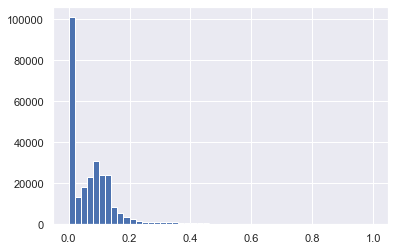

In [23]:
plt.hist(loan_data_defaults['recovery_rate'], bins = 50)
# We plot a histogram of a variable with 50 bins.

(array([  97.,   76.,   88.,  591.,   93.,  110.,  791.,  246.,  121.,
         737.,  528.,  175.,  606.,  779.,  287.,  624.,  878.,  445.,
         638.,  957.,  651.,  674., 1065.,  754.,  843., 1103.,  922.,
         950., 1151.,  959., 1083., 1305., 1161., 1271., 1478., 1336.,
        1335., 1632., 1538., 1489., 1731., 1668., 1680., 1904., 1882.,
        1963., 2104., 2025., 2150., 2202., 2107., 2468., 2441., 2269.,
        2664., 2768., 2717., 3173., 2738., 3081., 3144., 3149., 3412.,
        3398., 3439., 3900., 3524., 3872., 4006., 4015., 4333., 4630.,
        4449., 4659., 4695., 4896., 4948., 4832., 5324., 4957., 5478.,
        5445., 5081., 6338., 5446., 5980., 6247., 5671., 6931., 5306.,
        7138., 6107., 5195., 6862., 4101., 6947., 3623., 5188., 2118.,
        3234.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29

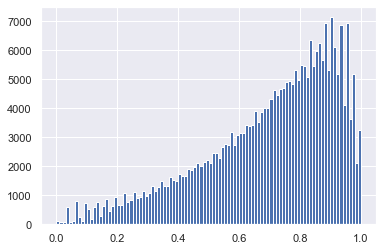

In [24]:
plt.hist(loan_data_defaults['CCF'], bins = 100)
# We plot a histogram of a variable with 100 bins.

In [25]:
loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)
# We create a new variable which is 0 if recovery rate is 0 and 1 otherwise.

<ipython-input-25-0abe55975dd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)


In [26]:
loan_data_defaults['recovery_rate_0_1']

13         1
25         1
30         0
31         0
33         0
41         0
60         0
63         1
65         1
68         1
78         0
79         0
83         1
84         0
99         1
102        1
105        1
118        1
128        1
132        1
143        1
144        1
146        0
149        1
152        1
158        1
160        0
171        0
174        0
177        1
181        1
184        1
205        1
217        0
218        0
231        1
237        1
246        1
247        1
248        0
249        1
276        1
277        1
291        1
297        1
308        1
312        0
320        1
321        1
331        1
335        0
342        0
350        1
355        1
358        1
360        0
361        1
365        1
370        1
377        1
382        0
383        0
384        0
393        1
419        1
427        1
436        0
442        1
443        1
449        1
456        1
476        1
489        0
502        1
505        0
507        0
508        1

In [27]:
loan_data_defaults.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med',
       'mths_since_last_maj

# LGD Model

### Splitting Data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# LGD model stage 1 datasets: recovery rate 0 or greater than 0.
lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test = train_test_split(loan_data_defaults.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['recovery_rate_0_1'], test_size = 0.2, random_state = 42)
# Takes a set of inputs and a set of targets as arguments. Splits the inputs and the targets into four dataframes:
# Inputs - Train, Inputs - Test, Targets - Train, Targets - Test.

### Preparing the Inputs

In [30]:
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']
# List of all independent variables for the models.

In [31]:
features_reference_cat = ['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']
# List of the dummy variable reference categories. 

In [32]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[features_all]
# Here we keep only the variables we need for the model.

In [33]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [34]:
lgd_inputs_stage_1_train.isnull().sum()
# Check for missing values. We check whether the value of each row for each column is missing or not,
# then sum accross columns.

grade:A                                0
grade:B                                0
grade:C                                0
grade:D                                0
grade:E                                0
grade:F                                0
home_ownership:MORTGAGE                0
home_ownership:NONE                    0
home_ownership:OTHER                   0
home_ownership:OWN                     0
verification_status:Not Verified       0
verification_status:Source Verified    0
purpose:car                            0
purpose:debt_consolidation             0
purpose:educational                    0
purpose:home_improvement               0
purpose:house                          0
purpose:major_purchase                 0
purpose:medical                        0
purpose:moving                         0
purpose:other                          0
purpose:renewable_energy               0
purpose:small_business                 0
purpose:vacation                       0
purpose:wedding 

### Estimating the Model

In [35]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

In [36]:
reg_lgd_st_1 = LogisticRegression_with_p_values()
# We create an instance of an object from the 'LogisticRegression' class.
reg_lgd_st_1.fit(lgd_inputs_stage_1_train, lgd_targets_stage_1_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

C:\Users\thdam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
feature_name = lgd_inputs_stage_1_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [38]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
p_values = reg_lgd_st_1.p_values
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.
p_values = np.append(np.nan,np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table

Feature name  Coefficients       p_values
0                             Intercept -3.377547e-04            NaN
1                               grade:A -1.747122e-04   9.962139e-01
2                               grade:B -1.364683e-04   9.962590e-01
3                               grade:C -2.415486e-06   9.999294e-01
4                               grade:D -6.358173e-05   9.982064e-01
5                               grade:E -2.508096e-06   9.999360e-01
6                               grade:F  2.845637e-05   9.993931e-01
7               home_ownership:MORTGAGE  5.395332e-05   9.960621e-01
8                   home_ownership:NONE  1.813248e-07   9.999999e-01
9                  home_ownership:OTHER  7.523874e-07   9.999991e-01
10                   home_ownership:OWN -2.257550e-05   9.988825e-01
11     verification_status:Not Verified -2.361964e-04   9.860776e-01
12  verification_status:Source Verified -2.620445e-04   9.811849e-01
13                          purpose:car -1.339338e-05   9.998101e-01
14           purpose:debt_consolidation -1.511698e-04   9.906261e-01
15                  purpose:educational  1.091091e-06   9.999985e-01
16             purpose:home_improvement -9.176825e-06   9.996843e-01
17                        purpose:house -2.453608e-06   9.999693e-01
18               purpose:major_purchase -1.287491e-05   9.997120e-01
19                      purpose:medical -1.103964e-05   9.998001e-01
20                       purpose:moving  1.227077e-06   9.999822e-01
21                        purpose:other -2.699997e-05   9.990565e-01
22             purpose:renewable_energy  8.536821e-07   9.999961e-01
23               purpose:small_business  1.217738e-05   9.997600e-01
24                     purpose:vacation -4.003282e-06   9.999474e-01
25                      purpose:wedding  6.595166e-06   9.999749e-01
26                initial_list_status:w -3.706750e-04   9.728076e-01
27                             term_int -1.339851e-02   1.158407e-38
28                       emp_length_int  1.122684e-04   9.292075e-01
29                   mths_since_issue_d  2.971513e-02   0.000000e+00
30          mths_since_earliest_cr_line -1.448439e-03  1.256735e-145
31                          funded_amnt  2.175717e-05   6.781463e-09
32                             int_rate -3.293622e-03   1.444881e-01
33                          installment -4.584544e-04   8.989989e-05
34                           annual_inc  2.099763e-06   2.400719e-51
35                          delinq_2yrs  2.564300e-04   9.615023e-01
36                       inq_last_6mths  3.188915e-04   9.493444e-01
37               mths_since_last_delinq -3.478652e-03   8.210246e-61
38               mths_since_last_record  1.581391e-04   4.417258e-01
39                             open_acc -2.986544e-03   1.665596e-02
40                              pub_rec  9.990840e-05   9.913811e-01
41                            total_acc -2.153240e-03   2.916597e-04
42                       acc_now_delinq  1.486552e-05   9.997968e-01
43                     total_rev_hi_lim -4.008611e-06   1.126481e-77

In [39]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_1.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

Feature name  Coefficients       p_values
0                             Intercept -3.377547e-04            NaN
1                               grade:A -1.747122e-04   9.962139e-01
2                               grade:B -1.364683e-04   9.962590e-01
3                               grade:C -2.415486e-06   9.999294e-01
4                               grade:D -6.358173e-05   9.982064e-01
5                               grade:E -2.508096e-06   9.999360e-01
6                               grade:F  2.845637e-05   9.993931e-01
7               home_ownership:MORTGAGE  5.395332e-05   9.960621e-01
8                   home_ownership:NONE  1.813248e-07   9.999999e-01
9                  home_ownership:OTHER  7.523874e-07   9.999991e-01
10                   home_ownership:OWN -2.257550e-05   9.988825e-01
11     verification_status:Not Verified -2.361964e-04   9.860776e-01
12  verification_status:Source Verified -2.620445e-04   9.811849e-01
13                          purpose:car -1.339338e-05   9.998101e-01
14           purpose:debt_consolidation -1.511698e-04   9.906261e-01
15                  purpose:educational  1.091091e-06   9.999985e-01
16             purpose:home_improvement -9.176825e-06   9.996843e-01
17                        purpose:house -2.453608e-06   9.999693e-01
18               purpose:major_purchase -1.287491e-05   9.997120e-01
19                      purpose:medical -1.103964e-05   9.998001e-01
20                       purpose:moving  1.227077e-06   9.999822e-01
21                        purpose:other -2.699997e-05   9.990565e-01
22             purpose:renewable_energy  8.536821e-07   9.999961e-01
23               purpose:small_business  1.217738e-05   9.997600e-01
24                     purpose:vacation -4.003282e-06   9.999474e-01
25                      purpose:wedding  6.595166e-06   9.999749e-01
26                initial_list_status:w -3.706750e-04   9.728076e-01
27                             term_int -1.339851e-02   1.158407e-38
28                       emp_length_int  1.122684e-04   9.292075e-01
29                   mths_since_issue_d  2.971513e-02   0.000000e+00
30          mths_since_earliest_cr_line -1.448439e-03  1.256735e-145
31                          funded_amnt  2.175717e-05   6.781463e-09
32                             int_rate -3.293622e-03   1.444881e-01
33                          installment -4.584544e-04   8.989989e-05
34                           annual_inc  2.099763e-06   2.400719e-51
35                          delinq_2yrs  2.564300e-04   9.615023e-01
36                       inq_last_6mths  3.188915e-04   9.493444e-01
37               mths_since_last_delinq -3.478652e-03   8.210246e-61
38               mths_since_last_record  1.581391e-04   4.417258e-01
39                             open_acc -2.986544e-03   1.665596e-02
40                              pub_rec  9.990840e-05   9.913811e-01
41                            total_acc -2.153240e-03   2.916597e-04
42                       acc_now_delinq  1.486552e-05   9.997968e-01
43                     total_rev_hi_lim -4.008611e-06   1.126481e-77

### Testing the Model

In [40]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]
# Here we keep only the variables we need for the model.

In [41]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [42]:
y_hat_test_lgd_stage_1 = reg_lgd_st_1.model.predict(lgd_inputs_stage_1_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [43]:
y_hat_test_lgd_stage_1

array([1, 1, 1, ..., 1, 1, 1])

In [44]:
y_hat_test_proba_lgd_stage_1 = reg_lgd_st_1.model.predict_proba(lgd_inputs_stage_1_test)
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [45]:
y_hat_test_proba_lgd_stage_1
# This is an array of arrays of predicted class probabilities for all classes.
# In this case, the first value of every sub-array is the probability for the observation to belong to the first class, i.e. 0,
# and the second value is the probability for the observation to belong to the first class, i.e. 1.

array([[0.35746759, 0.64253241],
       [0.33825415, 0.66174585],
       [0.12361485, 0.87638515],
       ...,
       [0.31344278, 0.68655722],
       [0.24991496, 0.75008504],
       [0.47932205, 0.52067795]])

In [46]:
y_hat_test_proba_lgd_stage_1 = y_hat_test_proba_lgd_stage_1[: ][: , 1]
# Here we take all the arrays in the array, and from each array, we take all rows, and only the element with index 1,
# that is, the second element.
# In other words, we take only the probabilities for being 1.

In [47]:
y_hat_test_proba_lgd_stage_1

array([0.64253241, 0.66174585, 0.87638515, ..., 0.68655722, 0.75008504,
       0.52067795])

In [48]:
lgd_targets_stage_1_test_temp = lgd_targets_stage_1_test

In [49]:
lgd_targets_stage_1_test_temp.reset_index(drop = True, inplace = True)
# We reset the index of a dataframe.

In [50]:
df_actual_predicted_probs = pd.concat([lgd_targets_stage_1_test_temp, pd.DataFrame(y_hat_test_proba_lgd_stage_1)], axis = 1)
# Concatenates two dataframes.

In [51]:
df_actual_predicted_probs.columns = ['lgd_targets_stage_1_test', 'y_hat_test_proba_lgd_stage_1']

In [52]:
df_actual_predicted_probs.index = lgd_inputs_stage_1_test.index
# Makes the index of one dataframe equal to the index of another dataframe.

In [53]:
df_actual_predicted_probs.head()

lgd_targets_stage_1_test  y_hat_test_proba_lgd_stage_1
1012760                         1                      0.642532
40179                           0                      0.661746
1615475                         1                      0.876385
1309822                         1                      0.818985
1167798                         1                      0.660703

### Estimating the Аccuracy of the Мodel

In [54]:
tr = 0.5
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'] > tr, 1, 0)

In [55]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted     0      1
Actual                
0          1308  15321
1           970  36265

In [56]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted         0         1
Actual                       
0          0.024283  0.284439
1          0.018008  0.673270

In [57]:
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

0.6975530966879548

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score

In [59]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.
# we store each of the three arrays in a separate variable.

Text(0.5, 1.0, 'ROC curve')

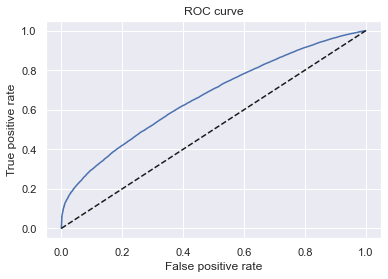

In [60]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [61]:
AUROC = roc_auc_score(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.6649540457741735

### Saving the Model

In [62]:
import pickle

In [63]:
#pickle.dump(reg_lgd_st_1, open('lgd_model_stage_1.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'lgd_model_stage_1.sav'.

### Stage 2 – Linear Regression

In [64]:
lgd_stage_2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]
# Here we take only rows where the original recovery rate variable is greater than one,
# i.e. where the indicator variable we created is equal to 1.

In [65]:
# LGD model stage 2 datasets: how much more than 0 is the recovery rate
lgd_inputs_stage_2_train, lgd_inputs_stage_2_test, lgd_targets_stage_2_train, lgd_targets_stage_2_test = train_test_split(lgd_stage_2_data.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), lgd_stage_2_data['recovery_rate'], test_size = 0.2, random_state = 42)
# Takes a set of inputs and a set of targets as arguments. Splits the inputs and the targets into four dataframes:
# Inputs - Train, Inputs - Test, Targets - Train, Targets - Test.

In [66]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
# Since the p-values are obtained through certain statistics, we need the 'stat' module from scipy.stats
import scipy.stats as stat

# Since we are using an object oriented language such as Python, we can simply define our own 
# LinearRegression class (the same one from sklearn)
# By typing the code below we will ovewrite a part of the class with one that includes p-values
# Here's the full source code of the ORIGINAL class: https://github.com/scikit-learn/scikit-learn/blob/7b136e9/sklearn/linear_model/base.py#L362


class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """
    
    # nothing changes in __init__
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs

    
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        
        # Calculate SSE (sum of squared errors)
        # and SE (standard error)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])

        # compute the t-statistic for each feature
        self.t = self.coef_ / se
        # find the p-value for each feature
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [68]:
import scipy.stats as stat

class LinearRegression(linear_model.LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        self.t = self.coef_ / se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [69]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train[features_all]
# Here we keep only the variables we need for the model.

In [70]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [71]:
reg_lgd_st_2 = LinearRegression()
# We create an instance of an object from the 'LogisticRegression' class.
reg_lgd_st_2.fit(lgd_inputs_stage_2_train, lgd_targets_stage_2_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

LinearRegression()

In [72]:
feature_name = lgd_inputs_stage_2_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [73]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
p_values = reg_lgd_st_2.p
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.
p_values = np.append(np.nan,np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.
summary_table['p_values'] = p_values.round(3)
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table

Feature name  Coefficients  p_values
0                             Intercept  1.826830e-01       NaN
1                               grade:A -3.935484e-02     0.000
2                               grade:B -3.962948e-02     0.000
3                               grade:C -3.309057e-02     0.000
4                               grade:D -2.317540e-02     0.000
5                               grade:E -1.350806e-02     0.000
6                               grade:F -5.709300e-03     0.002
7               home_ownership:MORTGAGE  3.832970e-03     0.000
8                   home_ownership:NONE  2.030602e-01     0.000
9                  home_ownership:OTHER -6.155970e-04     0.975
10                   home_ownership:OWN  3.848815e-03     0.000
11     verification_status:Not Verified -9.166316e-04     0.182
12  verification_status:Source Verified -1.375885e-03     0.014
13                          purpose:car  1.564705e-03     0.580
14           purpose:debt_consolidation  1.300617e-03     0.048
15                  purpose:educational  4.806139e-02     0.000
16             purpose:home_improvement -6.035861e-04     0.611
17                        purpose:house -5.934139e-04     0.854
18               purpose:major_purchase  2.485080e-04     0.892
19                      purpose:medical  4.107501e-03     0.073
20                       purpose:moving  2.945562e-03     0.281
21                        purpose:other  2.714837e-03     0.019
22             purpose:renewable_energy  1.038985e-03     0.902
23               purpose:small_business -5.046484e-03     0.008
24                     purpose:vacation  4.908347e-03     0.114
25                      purpose:wedding  1.175286e-02     0.061
26                initial_list_status:w -4.625708e-03     0.000
27                             term_int  5.291870e-04     0.000
28                       emp_length_int  2.710414e-04     0.000
29                   mths_since_issue_d -9.119843e-04     0.000
30          mths_since_earliest_cr_line  6.987577e-06     0.020
31                          funded_amnt -4.548234e-08     0.816
32                             int_rate -7.369321e-04     0.000
33                          installment -1.268530e-05     0.037
34                           annual_inc  1.105963e-08     0.004
35                          delinq_2yrs -5.900786e-04     0.027
36                       inq_last_6mths  6.996114e-06     0.977
37               mths_since_last_delinq -2.960500e-05     0.007
38               mths_since_last_record -1.583012e-05     0.162
39                             open_acc -7.227736e-04     0.000
40                              pub_rec -2.249877e-03     0.000
41                            total_acc  5.011690e-04     0.000
42                       acc_now_delinq -9.166833e-04     0.745
43                     total_rev_hi_lim  1.321013e-07     0.000

In [74]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_2.p
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values.round(3)
summary_table

Feature name  Coefficients  p_values
0                             Intercept  1.826830e-01       NaN
1                               grade:A -3.935484e-02     0.000
2                               grade:B -3.962948e-02     0.000
3                               grade:C -3.309057e-02     0.000
4                               grade:D -2.317540e-02     0.000
5                               grade:E -1.350806e-02     0.000
6                               grade:F -5.709300e-03     0.002
7               home_ownership:MORTGAGE  3.832970e-03     0.000
8                   home_ownership:NONE  2.030602e-01     0.000
9                  home_ownership:OTHER -6.155970e-04     0.975
10                   home_ownership:OWN  3.848815e-03     0.000
11     verification_status:Not Verified -9.166316e-04     0.182
12  verification_status:Source Verified -1.375885e-03     0.014
13                          purpose:car  1.564705e-03     0.580
14           purpose:debt_consolidation  1.300617e-03     0.048
15                  purpose:educational  4.806139e-02     0.000
16             purpose:home_improvement -6.035861e-04     0.611
17                        purpose:house -5.934139e-04     0.854
18               purpose:major_purchase  2.485080e-04     0.892
19                      purpose:medical  4.107501e-03     0.073
20                       purpose:moving  2.945562e-03     0.281
21                        purpose:other  2.714837e-03     0.019
22             purpose:renewable_energy  1.038985e-03     0.902
23               purpose:small_business -5.046484e-03     0.008
24                     purpose:vacation  4.908347e-03     0.114
25                      purpose:wedding  1.175286e-02     0.061
26                initial_list_status:w -4.625708e-03     0.000
27                             term_int  5.291870e-04     0.000
28                       emp_length_int  2.710414e-04     0.000
29                   mths_since_issue_d -9.119843e-04     0.000
30          mths_since_earliest_cr_line  6.987577e-06     0.020
31                          funded_amnt -4.548234e-08     0.816
32                             int_rate -7.369321e-04     0.000
33                          installment -1.268530e-05     0.037
34                           annual_inc  1.105963e-08     0.004
35                          delinq_2yrs -5.900786e-04     0.027
36                       inq_last_6mths  6.996114e-06     0.977
37               mths_since_last_delinq -2.960500e-05     0.007
38               mths_since_last_record -1.583012e-05     0.162
39                             open_acc -7.227736e-04     0.000
40                              pub_rec -2.249877e-03     0.000
41                            total_acc  5.011690e-04     0.000
42                       acc_now_delinq -9.166833e-04     0.745
43                     total_rev_hi_lim  1.321013e-07     0.000

### Stage 2 – Linear Regression Evaluation

In [75]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test[features_all]
# Here we keep only the variables we need for the model.

In [76]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [77]:
lgd_inputs_stage_2_test.columns.values
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:w', 'term_int', 'emp_length_int',
       'mths_since_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

In [78]:
y_hat_test_lgd_stage_2 = reg_lgd_st_2.predict(lgd_inputs_stage_2_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [79]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test

In [80]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test_temp.reset_index(drop = True)
# We reset the index of a dataframe.

In [81]:
pd.concat([lgd_targets_stage_2_test_temp, pd.DataFrame(y_hat_test_lgd_stage_2)], axis = 1).corr()
# We calculate the correlation between actual and predicted values.

recovery_rate         0
recovery_rate       1.000000  0.213365
0                   0.213365  1.000000

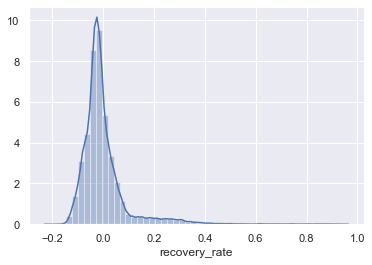

In [82]:
sns.distplot(lgd_targets_stage_2_test - y_hat_test_lgd_stage_2)
# We plot the distribution of the residuals.

In [83]:
#pickle.dump(reg_lgd_st_2, open('lgd_model_stage_2.sav', 'wb'))

### Combining Stage 1 and Stage 2

In [84]:
y_hat_test_lgd_stage_2_all = reg_lgd_st_2.predict(lgd_inputs_stage_1_test)

In [85]:
y_hat_test_lgd_stage_2_all

array([0.11914567, 0.11716128, 0.08830186, ..., 0.11201456, 0.11441328,
       0.13829339])

In [86]:
y_hat_test_lgd = y_hat_test_lgd_stage_1 * y_hat_test_lgd_stage_2_all
# Here we combine the predictions of the models from the two stages.

In [87]:
pd.DataFrame(y_hat_test_lgd).describe()
# Shows some descriptive statisics for the values of a column.

0
count  53864.000000
mean       0.105839
std        0.029058
min        0.000000
25%        0.097637
50%        0.110968
75%        0.123038
max        0.283055

In [88]:
y_hat_test_lgd = np.where(y_hat_test_lgd < 0, 0, y_hat_test_lgd)
y_hat_test_lgd = np.where(y_hat_test_lgd > 1, 1, y_hat_test_lgd)
# We set predicted values that are greater than 1 to 1 and predicted values that are less than 0 to 0.

In [89]:
pd.DataFrame(y_hat_test_lgd).describe()
# Shows some descriptive statisics for the values of a column.

0
count  53864.000000
mean       0.105839
std        0.029058
min        0.000000
25%        0.097637
50%        0.110968
75%        0.123038
max        0.283055

# EAD Model

### Estimation and Interpretation

In [90]:
# EAD model datasets
ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(loan_data_defaults.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['CCF'], test_size = 0.2, random_state = 42)
# Takes a set of inputs and a set of targets as arguments. Splits the inputs and the targets into four dataframes:
# Inputs - Train, Inputs - Test, Targets - Train, Targets - Test.

In [91]:
ead_inputs_train.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med',
       'mths_since_last_maj

In [92]:
ead_inputs_train = ead_inputs_train[features_all]
# Here we keep only the variables we need for the model.

In [93]:
ead_inputs_train = ead_inputs_train.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [94]:
reg_ead = LinearRegression()
# We create an instance of an object from the 'LogisticRegression' class.
reg_ead.fit(ead_inputs_train, ead_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

LinearRegression()

In [95]:
feature_name = ead_inputs_train.columns.values

In [96]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
p_values = reg_lgd_st_2.p
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.
p_values = np.append(np.nan,np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table

Feature name  Coefficients      p_values
0                             Intercept  5.340389e-01           NaN
1                               grade:A  3.851081e-02  0.000000e+00
2                               grade:B  3.242338e-02  0.000000e+00
3                               grade:C  3.145432e-02  0.000000e+00
4                               grade:D  2.651446e-02  0.000000e+00
5                               grade:E  1.817744e-02  0.000000e+00
6                               grade:F  6.750834e-03  2.450520e-03
7               home_ownership:MORTGAGE -1.471198e-03  5.450085e-12
8                   home_ownership:NONE  1.009118e-01  1.144895e-08
9                  home_ownership:OTHER  1.174776e-01  9.750068e-01
10                   home_ownership:OWN  4.143913e-04  3.756011e-06
11     verification_status:Not Verified  9.216404e-03  1.815388e-01
12  verification_status:Source Verified -4.039286e-03  1.438266e-02
13                          purpose:car  1.902319e-02  5.803727e-01
14           purpose:debt_consolidation  1.172626e-02  4.845691e-02
15                  purpose:educational  2.288575e-01  3.715747e-05
16             purpose:home_improvement  2.516151e-02  6.111640e-01
17                        purpose:house  4.157363e-02  8.544435e-01
18               purpose:major_purchase  3.528368e-02  8.915086e-01
19                      purpose:medical  4.659902e-02  7.288709e-02
20                       purpose:moving  4.677225e-02  2.811148e-01
21                        purpose:other  3.229153e-02  1.915263e-02
22             purpose:renewable_energy  5.762809e-02  9.016495e-01
23               purpose:small_business  5.419194e-02  8.193345e-03
24                     purpose:vacation  2.696069e-02  1.137865e-01
25                      purpose:wedding  1.261117e-01  6.136697e-02
26                initial_list_status:w -7.555137e-03  2.220446e-16
27                             term_int  4.945025e-03  0.000000e+00
28                       emp_length_int -1.474321e-03  3.112185e-05
29                   mths_since_issue_d -3.495239e-03  0.000000e+00
30          mths_since_earliest_cr_line -6.333466e-05  2.025552e-02
31                          funded_amnt -2.794228e-07  8.157052e-01
32                             int_rate  9.404253e-03  3.932041e-10
33                          installment  2.348570e-05  3.693010e-02
34                           annual_inc  1.514805e-08  4.260796e-03
35                          delinq_2yrs -3.612349e-03  2.694139e-02
36                       inq_last_6mths  1.007648e-02  9.766248e-01
37               mths_since_last_delinq -2.421034e-04  6.739984e-03
38               mths_since_last_record -2.302380e-05  1.622010e-01
39                             open_acc -2.363242e-03  0.000000e+00
40                              pub_rec -8.181090e-03  2.727607e-05
41                            total_acc  6.951738e-04  0.000000e+00
42                       acc_now_delinq  4.699064e-03  7.446992e-01
43                     total_rev_hi_lim  1.805845e-07  0.000000e+00

In [97]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_ead.p
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

Feature name  Coefficients      p_values
0                             Intercept  5.340389e-01           NaN
1                               grade:A  3.851081e-02  0.000000e+00
2                               grade:B  3.242338e-02  0.000000e+00
3                               grade:C  3.145432e-02  0.000000e+00
4                               grade:D  2.651446e-02  0.000000e+00
5                               grade:E  1.817744e-02  2.866707e-11
6                               grade:F  6.750834e-03  3.881214e-02
7               home_ownership:MORTGAGE -1.471198e-03  1.174093e-01
8                   home_ownership:NONE  1.009118e-01  2.403105e-01
9                  home_ownership:OTHER  1.174776e-01  2.050834e-04
10                   home_ownership:OWN  4.143913e-04  7.676712e-01
11     verification_status:Not Verified  9.216404e-03  1.332268e-15
12  verification_status:Source Verified -4.039286e-03  2.411050e-05
13                          purpose:car  1.902319e-02  5.770313e-05
14           purpose:debt_consolidation  1.172626e-02  0.000000e+00
15                  purpose:educational  2.288575e-01  0.000000e+00
16             purpose:home_improvement  2.516151e-02  0.000000e+00
17                        purpose:house  4.157363e-02  3.108624e-14
18               purpose:major_purchase  3.528368e-02  0.000000e+00
19                      purpose:medical  4.659902e-02  0.000000e+00
20                       purpose:moving  4.677225e-02  0.000000e+00
21                        purpose:other  3.229153e-02  0.000000e+00
22             purpose:renewable_energy  5.762809e-02  7.956376e-05
23               purpose:small_business  5.419194e-02  0.000000e+00
24                     purpose:vacation  2.696069e-02  2.894425e-07
25                      purpose:wedding  1.261117e-01  0.000000e+00
26                initial_list_status:w -7.555137e-03  6.661338e-16
27                             term_int  4.945025e-03  0.000000e+00
28                       emp_length_int -1.474321e-03  0.000000e+00
29                   mths_since_issue_d -3.495239e-03  0.000000e+00
30          mths_since_earliest_cr_line -6.333466e-05  0.000000e+00
31                          funded_amnt -2.794228e-07  3.913949e-01
32                             int_rate  9.404253e-03  0.000000e+00
33                          installment  2.348570e-05  2.097661e-02
34                           annual_inc  1.514805e-08  2.612041e-02
35                          delinq_2yrs -3.612349e-03  4.440892e-15
36                       inq_last_6mths  1.007648e-02  0.000000e+00
37               mths_since_last_delinq -2.421034e-04  0.000000e+00
38               mths_since_last_record -2.302380e-05  1.975046e-01
39                             open_acc -2.363242e-03  0.000000e+00
40                              pub_rec -8.181090e-03  0.000000e+00
41                            total_acc  6.951738e-04  0.000000e+00
42                       acc_now_delinq  4.699064e-03  3.541298e-01
43                     total_rev_hi_lim  1.805845e-07  0.000000e+00

### Model Validation

In [98]:
ead_inputs_test = ead_inputs_test[features_all]
# Here we keep only the variables we need for the model.

In [99]:
ead_inputs_test = ead_inputs_test.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [100]:
ead_inputs_test.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:w', 'term_int', 'emp_length_int',
       'mths_since_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

In [101]:
y_hat_test_ead = reg_ead.predict(ead_inputs_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [102]:
ead_targets_test_temp = ead_targets_test

In [103]:
ead_targets_test_temp = ead_targets_test_temp.reset_index(drop = True)
# We reset the index of a dataframe.

In [104]:
pd.concat([ead_targets_test_temp, pd.DataFrame(y_hat_test_ead)], axis = 1).corr()
# We calculate the correlation between actual and predicted values.

CCF         0
CCF  1.000000  0.478446
0    0.478446  1.000000

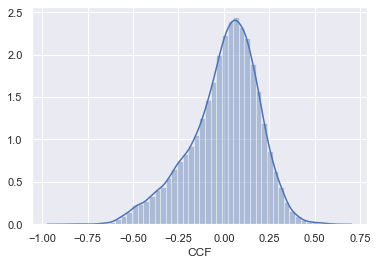

In [105]:
sns.distplot(ead_targets_test - y_hat_test_ead)
# We plot the distribution of the residuals.

In [106]:
pd.DataFrame(y_hat_test_ead).describe()
# Shows some descriptive statisics for the values of a column.

0
count  53864.000000
mean       0.696584
std        0.104826
min        0.250192
25%        0.622429
50%        0.693716
75%        0.766561
max        1.077174

In [107]:
y_hat_test_ead = np.where(y_hat_test_ead < 0, 0, y_hat_test_ead)
y_hat_test_ead = np.where(y_hat_test_ead > 1, 1, y_hat_test_ead)
# We set predicted values that are greater than 1 to 1 and predicted values that are less than 0 to 0.

In [108]:
pd.DataFrame(y_hat_test_ead).describe()
# Shows some descriptive statisics for the values of a column.

0
count  53864.000000
mean       0.696560
std        0.104751
min        0.250192
25%        0.622429
50%        0.693716
75%        0.766561
max        1.000000

# Expected Loss


In [109]:
loan_data_preprocessed.head()

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  68407277        NaN     3600.0       3600.0           3600.0   
1           1  68355089        NaN    24700.0      24700.0          24700.0   
2           2  68341763        NaN    20000.0      20000.0          20000.0   
3           3  66310712        NaN    35000.0      35000.0          35000.0   
4           4  68476807        NaN    10400.0      10400.0          10400.0   

         term  int_rate  installment grade  ... addr_state:UT addr_state:VA  \
0   36 months     13.99       123.03     C  ...             0             0   
1   36 months     11.99       820.28     C  ...             0             0   
2   60 months     10.78       432.66     B  ...             0             0   
3   60 months     14.85       829.90     C  ...             0             0   
4   60 months     22.45       289.91     F  ...             0             0   

  addr_state:VT addr_state:WA  addr_state:WI addr_state:WV addr_state:WY  \
0             0             0              0             0             0   
1             0             0              0             0             0   
2             0             0              0             0             0   
3             0             0              0             0             0   
4             0             0              0             0             0   

  initial_list_status:f initial_list_status:w good_bad  
0                     0                     1        1  
1                     0                     1        1  
2                     0                     1        1  
3                     0                     1        1  
4                     0                     1        1  

[5 rows x 286 columns]

In [110]:
loan_data_preprocessed['mths_since_last_delinq'].fillna(0, inplace = True)

In [111]:
loan_data_preprocessed['mths_since_last_record'].fillna(0, inplace = True)

In [112]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed[features_all]

In [113]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed_lgd_ead.drop(features_reference_cat, axis = 1)

In [114]:
loan_data_preprocessed['recovery_rate_st_1'] = reg_lgd_st_1.model.predict(loan_data_preprocessed_lgd_ead)

In [115]:
loan_data_preprocessed['recovery_rate_st_2'] = reg_lgd_st_2.predict(loan_data_preprocessed_lgd_ead)

In [116]:
loan_data_preprocessed['recovery_rate'] = loan_data_preprocessed['recovery_rate_st_1'] * loan_data_preprocessed['recovery_rate_st_2']

In [117]:
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] < 0, 0, loan_data_preprocessed['recovery_rate'])
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] > 1, 1, loan_data_preprocessed['recovery_rate'])

In [118]:
loan_data_preprocessed['LGD'] = 1 - loan_data_preprocessed['recovery_rate']
# We calculate estimated LGD. Estimated LGD equals 1 - estimated recovery rate.

In [119]:
loan_data_preprocessed['LGD'].describe()
# Shows some descriptive statisics for the values of a column.

count    2.260668e+06
mean     9.058710e-01
std      4.459927e-02
min      0.000000e+00
25%      8.764693e-01
50%      8.905920e-01
75%      9.127290e-01
max      1.000000e+00
Name: LGD, dtype: float64

In [120]:
loan_data_preprocessed['CCF'] = reg_ead.predict(loan_data_preprocessed_lgd_ead)
# We apply the EAD model to calculate estimated credit conversion factor.

In [121]:
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF'] < 0, 0, loan_data_preprocessed['CCF'])
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF'] > 1, 1, loan_data_preprocessed['CCF'])
# We set estimated CCF that are greater than 1 to 1 and  estimated CCF that are less than 0 to 0.

In [122]:
loan_data_preprocessed['EAD'] = loan_data_preprocessed['CCF'] * loan_data_preprocessed_lgd_ead['funded_amnt']
# We calculate estimated EAD. Estimated EAD equals estimated CCF multiplied by funded amount.

In [123]:
loan_data_preprocessed['EAD'].describe()
# Shows some descriptive statisics for the values of a column.

count    2.260668e+06
mean     1.073471e+04
std      7.295616e+03
min      0.000000e+00
25%      5.053747e+03
50%      8.919949e+03
75%      1.468079e+04
max      4.000000e+04
Name: EAD, dtype: float64

In [124]:
loan_data_preprocessed.head()

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  68407277        NaN     3600.0       3600.0           3600.0   
1           1  68355089        NaN    24700.0      24700.0          24700.0   
2           2  68341763        NaN    20000.0      20000.0          20000.0   
3           3  66310712        NaN    35000.0      35000.0          35000.0   
4           4  68476807        NaN    10400.0      10400.0          10400.0   

         term  int_rate  installment grade  ... addr_state:WY  \
0   36 months     13.99       123.03     C  ...             0   
1   36 months     11.99       820.28     C  ...             0   
2   60 months     10.78       432.66     B  ...             0   
3   60 months     14.85       829.90     C  ...             0   
4   60 months     22.45       289.91     F  ...             0   

  initial_list_status:f initial_list_status:w good_bad  recovery_rate_st_1  \
0                     0                     1        1                   1   
1                     0                     1        1                   1   
2                     0                     1        1                   1   
3                     0                     1        1                   1   
4                     0                     1        1                   1   

  recovery_rate_st_2 recovery_rate       LGD       CCF           EAD  
0           0.108057      0.108057  0.891943  0.649069   2336.647838  
1           0.109166      0.109166  0.890834  0.713439  17621.932206  
2           0.115076      0.115076  0.884924  0.756371  15127.421455  
3           0.115662      0.115662  0.884338  0.771367  26997.852291  
4           0.147680      0.147680  0.852320  0.870906   9057.419604  

[5 rows x 292 columns]

In [125]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv')
# We import data to apply the PD model.

In [126]:
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv')
# We import data to apply the PD model.

In [127]:
loan_data_inputs_pd = pd.concat([loan_data_inputs_train, loan_data_inputs_test], axis = 0)
# We concatenate the two dataframes along the rows.

In [128]:
loan_data_inputs_pd.shape

(2260668, 378)

In [129]:
loan_data_inputs_pd.head()

Unnamed: 0         id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0      305053   46845677    14050.0      14050.0     14050.000000   36 months   
1       50247   65791753    20000.0      20000.0     20000.000000   36 months   
2     1630021     705535    20000.0      20000.0     19403.287009   36 months   
3      927636  108579404    20000.0      20000.0     20000.000000   36 months   
4      758496  140791913    19200.0      19200.0     19200.000000   36 months   

   int_rate  installment grade sub_grade  ... sub_grade:F1 sub_grade:F2  \
0     15.61       491.26     D        D1  ...          NaN          NaN   
1     12.05       664.77     C        C1  ...          NaN          NaN   
2     10.00       645.35     B        B2  ...          NaN          NaN   
3      5.32       602.30     A        A1  ...          NaN          NaN   
4     11.55       633.60     B        B4  ...          NaN          NaN   

  sub_grade:F3  sub_grade:F4 sub_grade:F5 sub_grade:G1 sub_grade:G2  \
0          NaN           NaN          NaN          NaN          NaN   
1          NaN           NaN          NaN          NaN          NaN   
2          NaN           NaN          NaN          NaN          NaN   
3          NaN           NaN          NaN          NaN          NaN   
4          NaN           NaN          NaN          NaN          NaN   

  sub_grade:G3 sub_grade:G4 sub_grade:G5  
0          NaN          NaN          NaN  
1          NaN          NaN          NaN  
2          NaN          NaN          NaN  
3          NaN          NaN          NaN  
4          NaN          NaN          NaN  

[5 rows x 378 columns]

In [130]:
loan_data_inputs_pd = loan_data_inputs_pd.set_index('Unnamed: 0')
# We set the index of the dataframe to the values of a specific column. 

In [131]:
loan_data_inputs_pd.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
Unnamed: 0                                                                   
305053       46845677    14050.0      14050.0     14050.000000   36 months   
50247        65791753    20000.0      20000.0     20000.000000   36 months   
1630021        705535    20000.0      20000.0     19403.287009   36 months   
927636      108579404    20000.0      20000.0     20000.000000   36 months   
758496      140791913    19200.0      19200.0     19200.000000   36 months   

            int_rate  installment grade sub_grade  \
Unnamed: 0                                          
305053         15.61       491.26     D        D1   
50247          12.05       664.77     C        C1   
1630021        10.00       645.35     B        B2   
927636          5.32       602.30     A        A1   
758496         11.55       633.60     B        B4   

                                     emp_title  ... sub_grade:F1 sub_grade:F2  \
Unnamed: 0                                      ...                             
305053      Graphic Artist / Prepress Operator  ...          NaN          NaN   
50247                   Custodian 2 supervisor  ...          NaN          NaN   
1630021                    Aggregate Knowledge  ...          NaN          NaN   
927636                                  Owner   ...          NaN          NaN   
758496                            Data Analyst  ...          NaN          NaN   

            sub_grade:F3 sub_grade:F4 sub_grade:F5 sub_grade:G1 sub_grade:G2  \
Unnamed: 0                                                                     
305053               NaN          NaN          NaN          NaN          NaN   
50247                NaN          NaN          NaN          NaN          NaN   
1630021              NaN          NaN          NaN          NaN          NaN   
927636               NaN          NaN          NaN          NaN          NaN   
758496               NaN          NaN          NaN          NaN          NaN   

           sub_grade:G3 sub_grade:G4 sub_grade:G5  
Unnamed: 0                                         
305053              NaN          NaN          NaN  
50247               NaN          NaN          NaN  
1630021             NaN          NaN          NaN  
927636              NaN          NaN          NaN  
758496              NaN          NaN          NaN  

[5 rows x 377 columns]

In [136]:
features_all_pd = ['grade:A', 'grade:B', 'grade:C',
'grade:D', 'grade:E', 'grade:F', 'grade:G','home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:MORTGAGE', 
'home_ownership:OWN',
'addr_state:LA_AR_AL_MS_OK_NM_SD_NV_IA',
'addr_state:MO_NC_MD_IN_AK_NE_NJ', 
'addr_state:MI_PA_MN_TN_VA_HI',
'addr_state:OH_WI_AZ_MA_UT_DE',
'addr_state:GA_IL_WY_RI',
'addr_state:MT_WA_SC_OR_ND_KS_CT_CO_NH_WV_DC_VT_ID_ME', 
'addr_state:FL',
'addr_state:NY',
'addr_state:CA',
'addr_state:TX',
'verification_status:Verified',
'verification_status:Source Verified',
'verification_status:Not Verified',
'purpose:educ__ren_en__sm_b__mov',
'purpose:debt_consolidation',
'purpose:med__oth__house__wedd',
'purpose:major_purch__vacation__home_impr__car',
'purpose:credit_card',
'initial_list_status:f',
'initial_list_status:w',
'term:60',
'term:36',
'emp_length:0',
'emp_length:1',
'emp_length:2-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<30',
'mths_since_issue_d:30-33',
'mths_since_issue_d:33-40',
'mths_since_issue_d:41-46',
'mths_since_issue_d:46-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<8.392',
'int_rate:8.392-11.987',
'int_rate:11.987-15.582',
'int_rate:15.582-19.177',
'int_rate:>19.177',
'mths_since_earliest_cr_line:<167',
'mths_since_earliest_cr_line:167-250',
'mths_since_earliest_cr_line:251-355',
'mths_since_earliest_cr_line:356-417',
'mths_since_earliest_cr_line:>417',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0',
'pub_rec:1-2',
'pub_rec:>=3',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_record:Missing',
'mths_since_last_record:0-37',
'mths_since_last_record:37-60',
'mths_since_last_record:61-90',
'mths_since_last_record:>90']

In [137]:
ref_categories_pd = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:LA_AR_AL_MS_OK_NM_SD_NV_IA',
'verification_status:Verified',
'purpose:educ__ren_en__sm_b__mov',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:<30',
'int_rate:<8.392',
'mths_since_earliest_cr_line:<167',
'delinq_2yrs:0',
'inq_last_6mths:0',
'open_acc:0-3',
'pub_rec:0',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=10K',
'annual_inc:<20K',
'mths_since_last_record:Missing']

In [138]:
loan_data_inputs_pd_temp = loan_data_inputs_pd[features_all_pd]
# Here we keep only the variables we need for the model.

In [139]:
loan_data_inputs_pd_temp = loan_data_inputs_pd_temp.drop(ref_categories_pd, axis = 1)
# Here we remove the dummy variable reference categories.

In [140]:
loan_data_inputs_pd_temp.shape

(2260668, 81)

In [141]:
import pickle

In [142]:
#reg_pd = pickle.load(open('pd_model.sav', 'rb'))

In [143]:
reg_pd.model.predict_proba(loan_data_inputs_pd_temp)[: ][: , 0]
# We apply the PD model to caclulate estimated default probabilities.

array([0.26632193, 0.17280027, 0.09456747, ..., 0.07792592, 0.08417333,
       0.0674185 ])

In [144]:
loan_data_inputs_pd['PD'] = reg_pd.model.predict_proba(loan_data_inputs_pd_temp)[: ][: , 0]
# We apply the PD model to caclulate estimated default probabilities.

In [145]:
loan_data_inputs_pd['PD'].head()

Unnamed: 0
305053     0.266322
50247      0.172800
1630021    0.094567
927636     0.025100
758496     0.018849
Name: PD, dtype: float64

In [146]:
loan_data_inputs_pd['PD'].describe()
# Shows some descriptive statisics for the values of a column.

count    2.260668e+06
mean     1.286095e-01
std      1.001985e-01
min      3.514994e-03
25%      5.025070e-02
50%      1.034566e-01
75%      1.820233e-01
max      7.728177e-01
Name: PD, dtype: float64

In [149]:
loan_data_preprocessed.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med',
       'mths_since_last_maj

In [150]:
loan_data_inputs_pd.columns.values

array(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'initial_list_status', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_re

In [157]:
loan_data_preprocessed['PD'] = loan_data_inputs_pd['PD']

In [ ]:
loan_data_preprocessed_new.shape

In [ ]:
loan_data_preprocessed_new.head()

In [158]:
loan_data_preprocessed['EL'] = loan_data_preprocessed['PD'] * loan_data_preprocessed['LGD'] * loan_data_preprocessed['EAD']
# We calculate Expected Loss. EL = PD * LGD * EAD.

In [159]:
loan_data_preprocessed['EL'].describe()
# Shows some descriptive statisics for the values of a column.

count    2.260637e+06
mean     1.203603e+03
std      1.364584e+03
min      0.000000e+00
25%      3.232740e+02
50%      7.279654e+02
75%      1.566093e+03
max      2.152689e+04
Name: EL, dtype: float64

In [ ]:
loan_data_preprocessed_new['funded_amnt'].describe()

In [163]:
loan_data_preprocessed['EL'].sum()

2720909369.6007743

In [165]:
loan_data_preprocessed['funded_amnt'].sum()

34004208600.0

In [167]:
loan_data_preprocessed['EL'].sum() / loan_data_preprocessed['funded_amnt'].sum()

0.08001684149181387